<a href="https://colab.research.google.com/github/shams-mehdi/basic_algo/blob/main/stochastic_hill_climbing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stochastic Hill Climbing**

Local optimization algortihm<n>


*   Starts from a local solution and searches nearby areas
*   Good to run after a global optimization algorithm
*   Uses randomness to escape local barriers
*   Name "hill climbing" comes from applications to maximization problems

Takes initial point as input and generate a new point within search step size (also input). If it is equal or better than the current point, new value is accepted.



In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

#define objective function
def obj(x):
  return x**2

#define domain for initial guess
bound = np.array([-5,5])

def shc(obj, bound, step_size, iterations):
  x = np.random.uniform(bound[0],bound[1])
  best_y = obj(x)
  trial_x_store = np.zeros((iterations))
  trial_y_store = np.zeros((iterations))

  improv_counter = 0
  improv_y = []
  for i in tqdm(range(iterations)):
    trial_x = x + np.random.uniform(-step_size,step_size)
    trial_y = obj(trial_x)
    trial_x_store[i] = trial_x
    trial_y_store[i] = trial_y

    if trial_y <= best_y:
      best_y = trial_y
      x = trial_x
      improv_counter += 1
      improv_y.append(best_y)
    
  return trial_x_store, trial_y_store, improv_counter, improv_y

trial_x_store, trial_y_store, improv_counter, improv_y = shc(obj, bound, 0.5, 5000)

100%|██████████| 5000/5000 [00:00<00:00, 251771.03it/s]


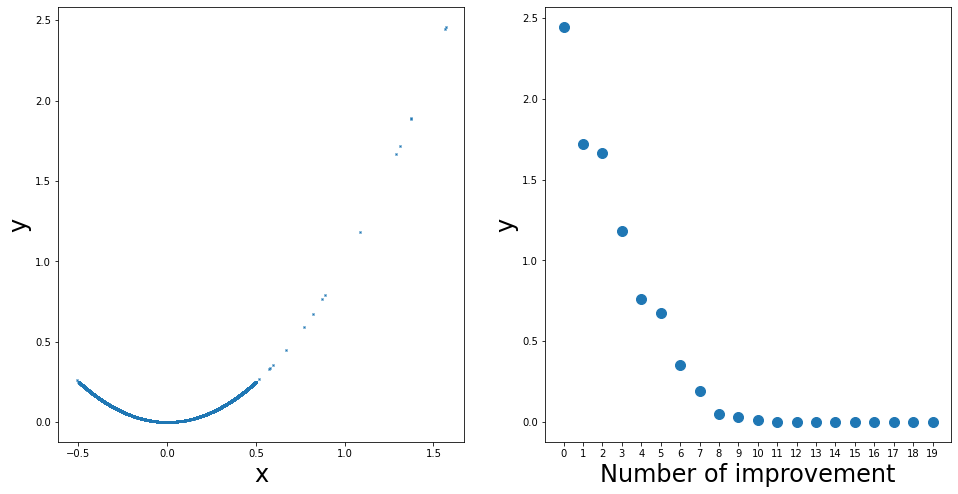

In [18]:
fig,ax = plt.subplots(1,2,figsize = (16,8))
ax[0].plot(trial_x_store,trial_y_store, 'x', markersize = 2)
ax[1].plot(np.arange(improv_counter), improv_y, 'o', markersize = 10)

ax[0].set_xlabel('x', fontsize = 24)
ax[0].set_ylabel('y', fontsize = 24)
ax[1].set_xlabel('Number of improvement', fontsize = 24)
ax[1].set_ylabel('y', fontsize = 24)
ax[1].set_xticks(np.arange(improv_counter))

Notes:


*   After finding a "best/minimum" value it doesnt go more than the step size to the opposite of the starting side
*   Condition for acceptance should include equality condition to encourage lateral movement. Otherwise, the algorithm may get stuck in a region of long flat surface

[reference](https://machinelearningmastery.com/stochastic-hill-climbing-in-python-from-scratch/)
